In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import pandas as pd 
from scipy.sparse import csr_matrix
import numpy as np
from utils import description_length, F1, matmul

root = r'..\models\bmf-maxsat-avellaneda\data'
datasets = [
    'iris', 
    'car', 
    'chess_krvskp',
    'cmc', 
    'flare',
    'heart', 
    'lymphography',
    'nursery', 
    'phishing', 
    'studentPerformance', 
    'ThoraricSurgery', 
    'tictactoe', 
    'zoo'
]

for name in datasets:
    path = root + '\\' + name + '.csv'
    df = pd.read_csv(path)
    X = csr_matrix(df.values)
    print(name, X.shape)

iris (149, 126)
car (1727, 25)
chess_krvskp (3195, 39)
cmc (1472, 71)
flare (1065, 43)
heart (269, 382)
lymphography (147, 54)
nursery (12959, 31)
phishing (1352, 26)
studentPerformance (394, 176)
ThoraricSurgery (469, 340)
tictactoe (957, 28)
zoo (100, 28)


The following script finds the optimal tau for each dataset. It takes ~30 mins to run.

The results are: `optimal_tau = [0.2, 0.4, 0.5, 0.5, 0.5, 0.7, 0.6, 0.5, 0.5, 0.7, 0.7, 0.5, 0.6]`

In [2]:
# optimal_tau = [None] * len(datasets)
# model_list = [None] * len(datasets)

# for i, name in enumerate(datasets):
#     path = root + '\\' + name + '.csv'
#     df = pd.read_csv(path)
#     X = csr_matrix(df.values)
#     print(name, X.shape)

#     from datasets import RatioSplit, NoSplit
#     # split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
#     split = NoSplit(X=X)
#     X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

#     # ASSO
#     from models import Asso

#     k = 100

#     min_desc_len = float('inf')

#     for tau in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
            
#         model = Asso(k=k, tau=tau, w_fp=1, w_fn=1)
#         model.fit(X_train=X_train, task='reconstruction', verbose=False, display=True)

#         desc_len = description_length(gt=model.X_train, U=model.U, V=model.V, w_model=1, w_fp=1, w_fn=1)

#         if desc_len < min_desc_len:
#             min_desc_len = desc_len
#             optimal_tau[i] = tau
#             model_list[i] = model
#             print(name, tau, desc_len)


iris (149, 126)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567531
[I]   train_size   : 745
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567531
[I] tau          : 0.2
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


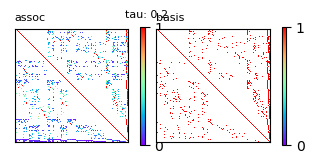

61it [00:13,  4.57it/s]                                       

[W] Stopped in advance: No pattern found.
[W] Obtained 61 factor(s).


train                                             \
                               0                                              
                 time   k  score score_0.5 desc_len    shape   TP       TPR   
0   28/06/24 05:38:57   0   27.0      13.5    740.0  [19, 3]   42  0.056376   
1   28/06/24 05:38:58   1   53.0      26.5    729.0  [11, 4]   77  0.103356   
2   28/06/24 05:38:58   2   79.0      39.5    718.0  [13, 2]  103  0.138255   
3   28/06/24 05:38:58   3   99.0      49.5    711.0   [9, 4]  131  0.175839   
4   28/06/24 05:38:59   4  115.0      57.5    704.0   [4, 5]  149  0.200000   
5   28/06/24 05:38:59   5  131.0      65.5    698.0   [6, 4]  169  0.226846   
6   28/06/24 05:38:59   6  144.0      72.0    699.0   [9, 5]  198  0.265772   
7   28/06/24 05:38:59   7  156.0      78.0    696.0   [4, 5]  214  0.287248   
8   28/06/24 05:39:00   8  166.0      83.0    694.0   [4, 4]  227  0.304698   
9   28/06/24 05:39:00   9  174.0      87.0    694.0   [2, 6]  237  0.318121   
10  28/06/24 05:39:00  10  182.0      91.0    693.0   [3, 4]  247  0.331544   
11  28/06/24 05:39:00  11  189.0      94.5    695.0   [3, 6]  258  0.346309   
12  28/06/24 05:39:01  12  196.0      98.0    696.0   [3, 5]  269  0.361074   
13  28/06/24 05:39:01  13  203.0     101.5    697.0   [3, 5]  280  0.375839   
14  28/06/24 05:39:01  14  210.0     105.0    698.0   [4, 4]  291  0.390604   
15  28/06/24 05:39:01  15  216.0     108.0    699.0   [2, 5]  299  0.401342   
16  28/06/24 05:39:02  16  222.0     111.0    700.0   [2, 5]  307  0.412081   
17  28/06/24 05:39:02  17  228.0     114.0    701.0   [2, 5]  315  0.422819   
18  28/06/24 05:39:02  18  234.0     117.0    704.0   [3, 6]  327  0.438926   
19  28/06/24 05:39:02  19  239.0     119.5    705.0   [1, 5]  332  0.445638   
20  28/06/24 05:39:03  20  244.0     122.0    706.0   [1, 5]  337  0.452349   
21  28/06/24 05:39:03  21  249.0     124.5    707.0   [1, 5]  342  0.459060   
22  28/06/24 05:39:03  22  254.0     127.0    710.0   [5, 3]  347  0.465772   
23  28/06/24 05:39:03  23  259.0     129.5    711.0   [1, 5]  352  0.472483   
24  28/06/24 05:39:04  24  264.0     132.0    714.0   [3, 5]  362  0.485906   
25  28/06/24 05:39:04  25  269.0     134.5    719.0   [3, 7]  375  0.503356   
26  28/06/24 05:39:04  26  274.0     137.0    720.0   [1, 5]  380  0.510067   
27  28/06/24 05:39:04  27  279.0     139.5    721.0   [1, 5]  385  0.516779   
28  28/06/24 05:39:04  28  284.0     142.0    722.0   [1, 5]  390  0.523490   
29  28/06/24 05:39:05  29  288.0     144.0    724.0   [2, 4]  394  0.528859   
30  28/06/24 05:39:05  30  292.0     146.0    730.0   [2, 8]  404  0.542282   
31  28/06/24 05:39:05  31  295.0     147.5    733.0   [1, 5]  407  0.546309   
32  28/06/24 05:39:05  32  298.0     149.0    736.0   [1, 5]  410  0.550336   
33  28/06/24 05:39:06  33  301.0     150.5    739.0   [1, 5]  413  0.554362   
34  28/06/24 05:39:06  34  304.0     152.0    744.0   [2, 6]  419  0.562416   
35  28/06/24 05:39:06  35  307.0     153.5    749.0   [1, 7]  424  0.569128   
36  28/06/24 05:39:06  36  310.0     155.0    754.0   [1, 7]  429  0.575839   
37  28/06/24 05:39:06  37  312.0     156.0    758.0   [1, 5]  431  0.578523   
38  28/06/24 05:39:07  38  314.0     157.0    762.0   [1, 5]  433  0.581208   
39  28/06/24 05:39:07  39  316.0     158.0    769.0   [1, 8]  438  0.587919   
40  28/06/24 05:39:07  40  318.0     159.0    776.0   [2, 7]  446  0.598658   
41  28/06/24 05:39:07  41  320.0     160.0    779.0   [1, 4]  448  0.601342   
42  28/06/24 05:39:07  42  322.0     161.0    783.0   [1, 5]  450  0.604027   
43  28/06/24 05:39:07  43  324.0     162.0    787.0   [1, 5]  452  0.606711   
44  28/06/24 05:39:08  44  326.0     163.0    792.0   [1, 6]  456  0.612081   
45  28/06/24 05:39:08  45  328.0     164.0    797.0   [1, 6]  460  0.617450   
46  28/06/24 05:39:08  46  330.0     165.0    803.0   [1, 7]  462  0.620134   
47  28/06/24 05:39:08  47  332.0     166.0    807.0   [1, 5]  464  0.622819  

[I] model saved as: 24-06-28_17-39-11_Asso.pickle


<Figure size 640x480 with 0 Axes>

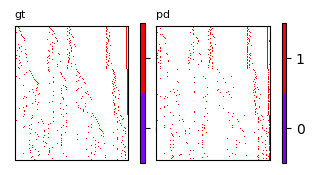

car (1727, 25)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567551
[I]   train_size   : 12089
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567551
[I] tau          : 0.4
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

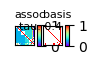

23it [00:01, 13.32it/s]                           

[W] Stopped in advance: No pattern found.
[W] Obtained 23 factor(s).


train                                      \
                                0                                       
                 time   k   score score_0.5 desc_len     shape     TP   
0   28/06/24 05:39:11   0  1341.0     670.5  11710.0  [959, 3]   2109   
1   28/06/24 05:39:11   1  1920.0     960.0  11582.0  [449, 2]   2688   
2   28/06/24 05:39:11   2  2384.0    1192.0  11512.0  [392, 2]   3152   
3   28/06/24 05:39:11   3  2800.0    1400.0  11466.0  [368, 2]   3568   
4   28/06/24 05:39:12   4  3184.0    1592.0  11471.0  [384, 5]   4720   
5   28/06/24 05:39:12   5  3543.0    1771.5  11473.0  [359, 2]   5079   
6   28/06/24 05:39:12   6  3902.0    1951.0  11475.0  [359, 2]   5438   
7   28/06/24 05:39:12   7  4259.0    2129.5  11477.0  [357, 2]   5795   
8   28/06/24 05:39:12   8  4584.0    2292.0  11479.0  [325, 2]   6120   
9   28/06/24 05:39:12   9  4908.0    2454.0  11481.0  [324, 2]   6444   
10  28/06/24 05:39:12  10  5230.0    2615.0  11483.0  [322, 2]   6766   
11  28/06/24 05:39:12  11  5544.0    2772.0  11485.0  [314, 2]   7080   
12  28/06/24 05:39:12  12  5856.0    2928.0  11487.0  [312, 2]   7392   
13  28/06/24 05:39:12  13  6156.0    3078.0  11489.0  [300, 2]   7692   
14  28/06/24 05:39:12  14  6448.0    3224.0  11491.0  [292, 2]   7984   
15  28/06/24 05:39:12  15  6740.0    3370.0  11493.0  [292, 2]   8276   
16  28/06/24 05:39:12  16  7017.0    3508.5  11495.0  [277, 2]   8553   
17  28/06/24 05:39:13  17  7285.0    3642.5  11497.0  [268, 2]   8821   
18  28/06/24 05:39:13  18  7553.0    3776.5  11499.0  [268, 2]   9089   
19  28/06/24 05:39:13  19  7821.0    3910.5  11501.0  [268, 2]   9357   
20  28/06/24 05:39:13  20  8079.0    4039.5  11503.0  [258, 2]   9615   
21  28/06/24 05:39:13  21  8261.0    4130.5  11406.0   [79, 6]   9907   
22  28/06/24 05:39:13  22  8386.0    4193.0  11367.0   [79, 7]  10226   

                                                                            \
                                                                             
         TPR    FP       FPR    FN       FNR       ERR       ACC    Recall   
0   0.174456   768  0.024706  9980  0.825544  0.248940  0.751060  0.174456   
1   0.222351   768  0.024706  9401  0.777649  0.235530  0.764470  0.222351   
2   0.260733   768  0.024706  8937  0.739267  0.224783  0.775217  0.260733   
3   0.295144   768  0.024706  8521  0.704856  0.215148  0.784852  0.295144   
4   0.390438  1536  0.049411  7369  0.609562  0.206254  0.793746  0.390438   
5   0.420134  1536  0.049411  7010  0.579866  0.197939  0.802061  0.420134   
6   0.449830  1536  0.049411  6651  0.550170  0.189624  0.810376  0.449830   
7   0.479361  1536  0.049411  6294  0.520639  0.181355  0.818645  0.479361   
8   0.506245  1536  0.049411  5969  0.493755  0.173827  0.826173  0.506245   
9   0.533047  1536  0.049411  5645  0.466953  0.166323  0.833677  0.533047   
10  0.559682  1536  0.049411  5323  0.440318  0.158865  0.841135  0.559682   
11  0.585656  1536  0.049411  5009  0.414344  0.151592  0.848408  0.585656   
12  0.611465  1536  0.049411  4697  0.388535  0.144366  0.855634  0.611465   
13  0.636281  1536  0.049411  4397  0.363719  0.137417  0.862583  0.636281   
14  0.660435  1536  0.049411  4105  0.339565  0.130654  0.869346  0.660435   
15  0.684589  1536  0.049411  3813  0.315411  0.123891  0.876109  0.684589   
16  0.707503  1536  0.049411  3536  0.292497  0.117475  0.882525  0.707503   
17  0.729672  1536  0.049411  3268  0.270328  0.111268  0.888732  0.729672   
18  0.751841  1536  0.049411  3000  0.248159  0.105061  0.894939  0.751841   
19  0.774009  1536  0.049411  2732  0.225991  0.098854  0.901146  0.774009   
20  0.795351  1536  0.049411  2474  0.204649  0.092878  0.907122  0.795351   
21  0.819505  1646  0.052950  2182  0.180495  0.088662  0.911338  0.819505   
22  0.845893  1840  0.059191  1863  0.154107  0.085767  0.914233  0.845893   

                        
                        
   Precision        F1  
0   0.733055  0.281839  


[I] model saved as: 24-06-28_17-39-13_Asso.pickle


<Figure size 640x480 with 0 Axes>

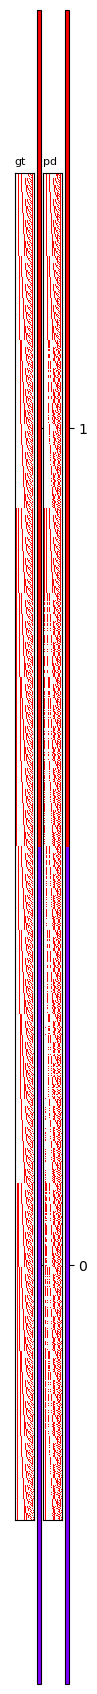

chess_krvskp (3195, 39)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567553
[I]   train_size   : 25581
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567553
[I] tau          : 0.5
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

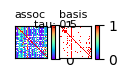

35it [00:05,  5.88it/s]                                     


[W] Stopped in advance: No pattern found.
[W] Obtained 35 factor(s).


train                                       \
                                 0                                        
                 time   k    score score_0.5 desc_len      shape     TP   
0   28/06/24 05:39:14   0   3320.0    1660.0  23362.0  [1094, 7]   5489   
1   28/06/24 05:39:14   1   5414.0    2707.0  22324.0  [1053, 3]   7991   
2   28/06/24 05:39:14   2   7131.0    3565.5  21774.0  [1164, 3]  10032   
3   28/06/24 05:39:14   3   8528.0    4264.0  20954.0   [572, 5]  11963   
4   28/06/24 05:39:14   4   9840.0    4920.0  20370.0   [724, 4]  13664   
5   28/06/24 05:39:15   5  11044.0    5522.0  20288.0  [1120, 2]  14868   
6   28/06/24 05:39:15   6  12044.0    6022.0  19931.0   [640, 3]  15917   
7   28/06/24 05:39:15   7  12935.0    6467.5  19878.0   [835, 3]  16858   
8   28/06/24 05:39:15   8  13723.0    6861.5  19733.0   [640, 3]  18007   
9   28/06/24 05:39:16   9  14500.0    7250.0  19729.0   [770, 3]  18852   
10  28/06/24 05:39:16  10  14953.0    7476.5  19725.0   [447, 2]  19305   
11  28/06/24 05:39:16  11  15341.0    7670.5  19724.0   [385, 2]  19693   
12  28/06/24 05:39:16  12  15698.0    7849.0  19562.0   [191, 4]  20072   
13  28/06/24 05:39:16  13  16019.0    8009.5  19561.0   [318, 2]  20393   
14  28/06/24 05:39:16  14  16324.0    8162.0  19420.0   [160, 4]  20723   
15  28/06/24 05:39:17  15  16585.0    8292.5  19345.0   [181, 5]  21037   
16  28/06/24 05:39:17  16  16800.0    8400.0  19268.0   [134, 4]  21340   
17  28/06/24 05:39:17  17  16992.0    8496.0  19272.0   [192, 4]  21540   
18  28/06/24 05:39:17  18  17113.0    8556.5  19236.0    [78, 7]  21676   
19  28/06/24 05:39:17  19  17229.0    8614.5  19210.0    [85, 5]  21792   
20  28/06/24 05:39:17  20  17331.0    8665.5  19214.0   [102, 4]  21914   
21  28/06/24 05:39:18  21  17400.0    8700.0  19215.0    [64, 6]  22019   
22  28/06/24 05:39:18  22  17467.0    8733.5  19208.0    [54, 6]  22103   
23  28/06/24 05:39:18  23  17525.0    8762.5  19191.0    [36, 5]  22161   
24  28/06/24 05:39:18  24  17574.0    8787.0  19194.0    [47, 5]  22239   
25  28/06/24 05:39:18  25  17600.0    8800.0  19198.0    [26, 4]  22271   
26  28/06/24 05:39:18  26  17623.0    8811.5  19203.0    [21, 7]  22301   
27  28/06/24 05:39:19  27  17640.0    8820.0  19210.0    [16, 8]  22322   
28  28/06/24 05:39:19  28  17655.0    8827.5  19213.0    [6, 12]  22344   
29  28/06/24 05:39:19  29  17670.0    8835.0  19215.0    [15, 2]  22359   
30  28/06/24 05:39:19  30  17683.0    8841.5  19221.0    [13, 6]  22393   
31  28/06/24 05:39:19  31  17695.0    8847.5  19226.0    [12, 5]  22420   
32  28/06/24 05:39:19  32  17702.0    8851.0  19233.0     [5, 9]  22430   
33  28/06/24 05:39:19  33  17707.0    8853.5  19239.0     [3, 8]  22437   
34  28/06/24 05:39:19  34  17709.0    8854.5  19243.0     [2, 4]  22439   

                                                                             \
                                                                              
         TPR    FP       FPR     FN       FNR       ERR       ACC    Recall   
0   0.214573  2169  0.021904  20092  0.785427  0.178653  0.821347  0.214573   
1   0.312380  2577  0.026024  17590  0.687620  0.161847  0.838153  0.312380   
2   0.392166  2901  0.029296  15549  0.607834  0.148068  0.851932  0.392166   
3   0.467652  3435  0.034689  13618  0.532348  0.136856  0.863144  0.467652   
4   0.534146  3824  0.038617  11917  0.465854  0.126327  0.873673  0.534146   
5   0.581213  3824  0.038617  10713  0.418787  0.116665  0.883335  0.581213   
6   0.622220  3873  0.039112   9664  0.377780  0.108639  0.891361  0.622220   
7   0.659005  3923  0.039617   8723  0.340995  0.101489  0.898511  0.659005   
8   0.703921  4284  0.043262   7574  0.296079  0.095165  0.904835  0.703921   
9   0.736953  4352  0.043949   6729  0.263047  0.088929  0.911071  0.736953   
10  0.754662  4352  0.043949   6276  0.245338  0.085294  0.914706  0.754662   
11  0.769829  4352  0.043949   5888  0.230171  0.082180  0.917820  0.769

[I] model saved as: 24-06-28_17-39-19_Asso.pickle


<Figure size 640x480 with 0 Axes>

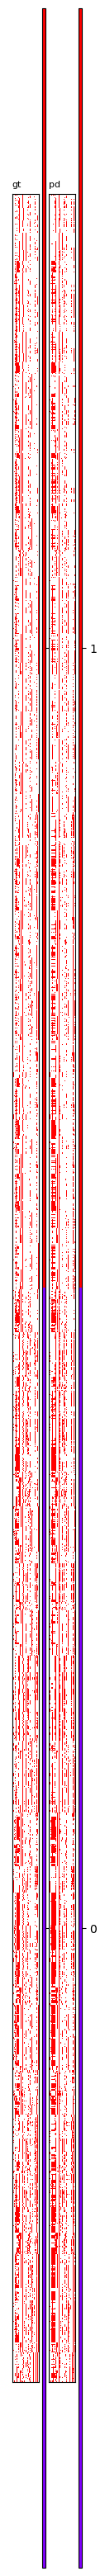

cmc (1472, 71)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567560
[I]   train_size   : 11002
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567560
[I] tau          : 0.5
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

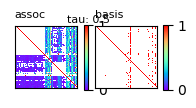

69it [00:10,  6.37it/s]                                     

[W] Stopped in advance: No pattern found.
[W] Obtained 69 factor(s).


train                                     \
                                0                                      
                 time   k   score score_0.5 desc_len     shape    TP   
0   28/06/24 05:39:20   0  1462.0     731.0  10044.0  [500, 4]  1731   
1   28/06/24 05:39:20   1  2079.0    1039.5   9855.0  [425, 3]  2677   
2   28/06/24 05:39:21   2  2538.0    1269.0   9658.0  [260, 2]  3136   
3   28/06/24 05:39:21   3  2918.0    1459.0   9585.0  [305, 2]  3516   
4   28/06/24 05:39:21   4  3233.0    1616.5   9542.0  [269, 3]  3930   
5   28/06/24 05:39:21   5  3530.0    1765.0   9471.0  [224, 2]  4227   
6   28/06/24 05:39:22   6  3802.0    1901.0   9448.0  [247, 2]  4499   
7   28/06/24 05:39:22   7  4049.0    2024.5   9439.0  [236, 2]  4746   
8   28/06/24 05:39:22   8  4281.0    2140.5   9439.0  [230, 2]  4978   
9   28/06/24 05:39:22   9  4501.0    2250.5   9436.0  [213, 4]  5224   
10  28/06/24 05:39:23  10  4690.0    2345.0   9438.0  [189, 2]  5413   
11  28/06/24 05:39:23  11  4865.0    2432.5   9429.0  [163, 3]  5600   
12  28/06/24 05:39:23  12  5031.0    2515.5   9430.0  [166, 1]  5766   
13  28/06/24 05:39:23  13  5182.0    2591.0   9432.0  [149, 4]  5933   
14  28/06/24 05:39:23  14  5330.0    2665.0   9371.0   [84, 3]  6121   
15  28/06/24 05:39:24  15  5458.0    2729.0   9373.0  [128, 2]  6249   
16  28/06/24 05:39:24  16  5562.0    2781.0   9376.0  [104, 3]  6365   
17  28/06/24 05:39:24  17  5665.0    2832.5   9379.0  [103, 3]  6470   
18  28/06/24 05:39:24  18  5766.0    2883.0   9382.0  [101, 3]  6574   
19  28/06/24 05:39:24  19  5858.0    2929.0   9383.0   [92, 1]  6666   
20  28/06/24 05:39:25  20  5934.0    2967.0   9384.0   [74, 3]  6755   
21  28/06/24 05:39:25  21  6009.0    3004.5   9387.0   [75, 3]  6830   
22  28/06/24 05:39:25  22  6076.0    3038.0   9390.0   [67, 3]  6897   
23  28/06/24 05:39:25  23  6128.0    3064.0   9392.0   [52, 2]  6949   
24  28/06/24 05:39:25  24  6178.0    3089.0   9394.0   [50, 2]  6999   
25  28/06/24 05:39:25  25  6227.0    3113.5   9395.0   [49, 1]  7048   
26  28/06/24 05:39:26  26  6273.0    3136.5   9397.0   [46, 2]  7094   
27  28/06/24 05:39:26  27  6318.0    3159.0   9399.0   [45, 2]  7139   
28  28/06/24 05:39:26  28  6362.0    3181.0   9401.0   [44, 2]  7183   
29  28/06/24 05:39:26  29  6405.0    3202.5   9403.0   [43, 2]  7226   
30  28/06/24 05:39:26  30  6447.0    3223.5   9405.0   [41, 3]  7270   
31  28/06/24 05:39:27  31  6488.0    3244.0   9393.0   [26, 3]  7319   
32  28/06/24 05:39:27  32  6527.0    3263.5   9395.0   [39, 2]  7358   
33  28/06/24 05:39:27  33  6564.0    3282.0   9397.0   [36, 3]  7399   
34  28/06/24 05:39:27  34  6601.0    3300.5   9399.0   [37, 2]  7436   
35  28/06/24 05:39:27  35  6637.0    3318.5   9402.0   [36, 3]  7476   
36  28/06/24 05:39:27  36  6673.0    3336.5   9404.0   [36, 2]  7512   
37  28/06/24 05:39:27  37  6709.0    3354.5   9406.0   [36, 2]  7548   
38  28/06/24 05:39:28  38  6744.0    3372.0   9408.0   [34, 3]  7584   
39  28/06/24 05:39:28  39  6777.0    3388.5   9409.0   [32, 2]  7617   
40  28/06/24 05:39:28  40  6809.0    3404.5   9406.0   [26, 3]  7652   
41  28/06/24 05:39:28  41  6840.0    3420.0   9407.0   [30, 2]  7683   
42  28/06/24 05:39:28  42  6870.0    3435.0   9409.0   [30, 2]  7713   
43  28/06/24 05:39:28  43  6898.0    3449.0   9411.0   [28, 2]  7741   
44  28/06/24 05:39:28  44  6925.0    3462.5   9412.0   [27, 1]  7768   
45  28/06/24 05:39:29  45  6947.0    3473.5   9412.0   [18, 4]  7806   
46  28/06/24 05:39:29  46  6968.0    3484.0   9416.0   [21, 4]  7827   
47  28/06/24 05:39:29  47  6989.0    3494.5   9419.0   [21, 3]  7848   
48  28/06/24 05:39:29  48  7009.0    3504.5   9422.0   [19, 4]  7869   
49  28/06/24 05:39:29  49  7028.0    3514.0   9424.0   [19, 2]  7888   
50  28/06/24 05:39:29  50  7047.0    3523.5   9427.0   [18, 4]  7908   
51  28/06/24 05:39:29  51  7064.0    3532.0   9430.0   [17, 3]  7925   
52  28/06/24 05:39:29  52  7079.0    3539.5   9428.0    [9, 4]  7943

[I] model saved as: 24-06-28_17-39-31_Asso.pickle


<Figure size 640x480 with 0 Axes>

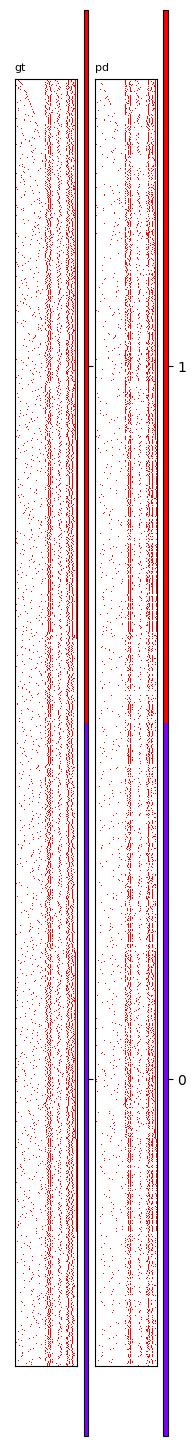

flare (1065, 43)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567571
[I]   train_size   : 9274
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567571
[I] tau          : 0.5
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

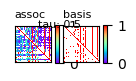

37it [00:03,  9.90it/s]                                    

[W] Stopped in advance: No pattern found.
[W] Obtained 37 factor(s).


train                                      \
                                0                                       
                 time   k   score score_0.5 desc_len      shape    TP   
0   28/06/24 05:39:32   0  3748.0    1874.0   6561.0  [1031, 4]  3936   
1   28/06/24 05:39:32   1  4582.0    2291.0   6016.0   [281, 8]  4915   
2   28/06/24 05:39:32   2  5083.0    2541.5   6021.0   [501, 5]  5460   
3   28/06/24 05:39:32   3  5516.0    2758.0   5855.0   [261, 6]  5903   
4   28/06/24 05:39:32   4  5896.0    2948.0   5671.0   [190, 6]  6283   
5   28/06/24 05:39:32   5  6239.0    3119.5   5474.0   [138, 8]  6689   
6   28/06/24 05:39:32   6  6538.0    3269.0   5359.0   [177, 7]  7085   
7   28/06/24 05:39:33   7  6670.0    3335.0   5368.0   [132, 9]  7243   
8   28/06/24 05:39:33   8  6791.0    3395.5   5373.0   [121, 5]  7364   
9   28/06/24 05:39:33   9  6902.0    3451.0   5353.0    [84, 7]  7489   
10  28/06/24 05:39:33  10  7014.0    3507.0   5361.0   [112, 8]  7645   
11  28/06/24 05:39:33  11  7104.0    3552.0   5357.0    [80, 6]  7735   
12  28/06/24 05:39:33  12  7181.0    3590.5   5362.0    [77, 5]  7812   
13  28/06/24 05:39:33  13  7256.0    3628.0   5369.0    [75, 7]  7899   
14  28/06/24 05:39:33  14  7311.0    3655.5   5375.0    [55, 6]  7954   
15  28/06/24 05:39:34  15  7362.0    3681.0   5353.0   [19, 10]  8029   
16  28/06/24 05:39:34  16  7395.0    3697.5   5358.0    [32, 6]  8062   
17  28/06/24 05:39:34  17  7426.0    3713.0   5357.0    [24, 6]  8096   
18  28/06/24 05:39:34  18  7448.0    3724.0   5361.0    [18, 8]  8124   
19  28/06/24 05:39:34  19  7464.0    3732.0   5363.0    [10, 8]  8141   
20  28/06/24 05:39:34  20  7479.0    3739.5   5369.0    [13, 8]  8163   
21  28/06/24 05:39:34  21  7494.0    3747.0   5374.0    [14, 6]  8178   
22  28/06/24 05:39:34  22  7509.0    3754.5   5379.0    [14, 6]  8193   
23  28/06/24 05:39:34  23  7521.0    3760.5   5385.0    [10, 8]  8205   
24  28/06/24 05:39:34  24  7530.0    3765.0   5392.0     [9, 7]  8219   
25  28/06/24 05:39:34  25  7536.0    3768.0   5399.0     [6, 7]  8227   
26  28/06/24 05:39:35  26  7542.0    3771.0   5403.0     [4, 6]  8236   
27  28/06/24 05:39:35  27  7547.0    3773.5   5407.0     [3, 6]  8242   
28  28/06/24 05:39:35  28  7551.0    3775.5   5415.0     [4, 8]  8248   
29  28/06/24 05:39:35  29  7554.0    3777.0   5423.0    [1, 10]  8251   
30  28/06/24 05:39:35  30  7557.0    3778.5   5426.0     [2, 4]  8254   
31  28/06/24 05:39:35  31  7559.0    3779.5   5434.0     [2, 8]  8258   
32  28/06/24 05:39:35  32  7561.0    3780.5   5441.0     [2, 7]  8260   
33  28/06/24 05:39:35  33  7563.0    3781.5   5449.0     [2, 8]  8262   
34  28/06/24 05:39:35  34  7564.0    3782.0   5458.0     [1, 9]  8263   
35  28/06/24 05:39:35  35  7565.0    3782.5   5469.0    [1, 11]  8264   
36  28/06/24 05:39:35  36  7566.0    3783.0   5480.0    [1, 11]  8265   

                                                                           \
                                                                            
         TPR   FP       FPR    FN       FNR       ERR       ACC    Recall   
0   0.424412  188  0.005148  5338  0.575588  0.120668  0.879332  0.424412   
1   0.529976  333  0.009118  4359  0.470024  0.102457  0.897543  0.529976   
2   0.588743  377  0.010323  3814  0.411257  0.091517  0.908483  0.588743   
3   0.636511  387  0.010597  3371  0.363489  0.082061  0.917939  0.636511   
4   0.677485  387  0.010597  2991  0.322515  0.073764  0.926236  0.677485   
5   0.721264  450  0.012322  2585  0.278736  0.066274  0.933726  0.721264   
6   0.763964  547  0.014978  2189  0.236036  0.059745  0.940255  0.763964   
7   0.781001  573  0.015690  2031  0.218999  0.056862  0.943138  0.781001   
8   0.794048  573  0.015690  1910  0.205952  0.054220  0.945780  0.794048   
9   0.807526  587  0.016073  1785  0.192474  0.051796  0.948204  0.807526   
10  0.824348  631  0.017278  1629  0.175652  0.049350  0.950650  0.824348   
11  0.834052  631  0.017278  

[I] model saved as: 24-06-28_17-39-35_Asso.pickle


<Figure size 640x480 with 0 Axes>

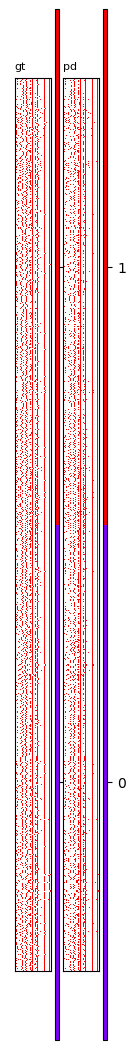

heart (269, 382)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567576
[I]   train_size   : 3025
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567576
[I] tau          : 0.7
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

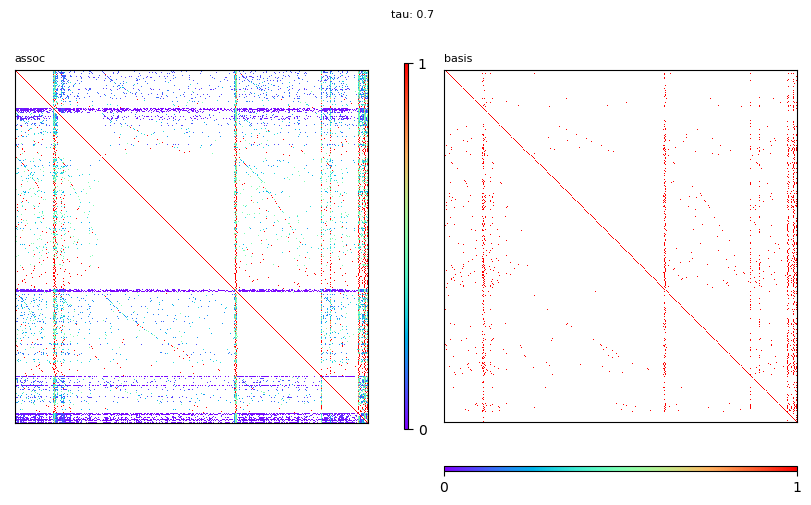

342it [03:18,  1.73it/s]                                       


[W] Stopped in advance: No pattern found.
[W] Obtained 342 factor(s).


train                                     \
                                  0                                      
                  time    k   score score_0.5 desc_len     shape    TP   
0    28/06/24 05:39:37    0   282.0     141.0   2843.0   [96, 4]   333   
1    28/06/24 05:39:38    1   525.0     262.5   2702.0   [95, 7]   787   
2    28/06/24 05:39:39    2   656.0     328.0   2703.0  [131, 1]   918   
3    28/06/24 05:39:40    3   761.0     380.5   2674.0   [74, 2]  1023   
4    28/06/24 05:39:41    4   840.0     420.0   2675.0   [79, 1]  1102   
5    28/06/24 05:39:42    5   912.0     456.0   2676.0   [72, 1]  1174   
6    28/06/24 05:39:43    6   979.0     489.5   2667.0   [56, 2]  1241   
7    28/06/24 05:39:44    7  1037.0     518.5   2668.0   [58, 1]  1299   
8    28/06/24 05:39:45    8  1087.0     543.5   2669.0   [50, 1]  1349   
9    28/06/24 05:39:46    9  1130.0     565.0   2666.0   [37, 3]  1406   
10   28/06/24 05:39:47   10  1170.0     585.0   2667.0   [40, 1]  1446   
11   28/06/24 05:39:48   11  1205.0     602.5   2670.0   [34, 4]  1487   
12   28/06/24 05:39:49   12  1235.0     617.5   2671.0   [30, 1]  1517   
13   28/06/24 05:39:50   13  1265.0     632.5   2672.0   [30, 1]  1547   
14   28/06/24 05:39:51   14  1292.0     646.0   2674.0   [27, 2]  1574   
15   28/06/24 05:39:52   15  1312.0     656.0   2675.0   [20, 1]  1594   
16   28/06/24 05:39:52   16  1330.0     665.0   2674.0   [15, 2]  1612   
17   28/06/24 05:39:53   17  1347.0     673.5   2675.0   [17, 1]  1629   
18   28/06/24 05:39:54   18  1363.0     681.5   2676.0   [16, 1]  1645   
19   28/06/24 05:39:55   19  1378.0     689.0   2673.0   [10, 2]  1660   
20   28/06/24 05:39:56   20  1392.0     696.0   2670.0    [9, 2]  1674   
21   28/06/24 05:39:57   21  1405.0     702.5   2672.0   [13, 2]  1687   
22   28/06/24 05:39:58   22  1418.0     709.0   2673.0   [13, 1]  1700   
23   28/06/24 05:39:59   23  1431.0     715.5   2675.0   [13, 2]  1713   
24   28/06/24 05:40:00   24  1443.0     721.5   2676.0   [12, 1]  1725   
25   28/06/24 05:40:01   25  1455.0     727.5   2677.0   [12, 1]  1737   
26   28/06/24 05:40:02   26  1467.0     733.5   2676.0    [8, 3]  1749   
27   28/06/24 05:40:03   27  1479.0     739.5   2678.0   [12, 2]  1761   
28   28/06/24 05:40:04   28  1491.0     745.5   2678.0    [8, 4]  1775   
29   28/06/24 05:40:05   29  1503.0     751.5   2679.0   [12, 1]  1787   
30   28/06/24 05:40:06   30  1515.0     757.5   2680.0   [10, 3]  1800   
31   28/06/24 05:40:07   31  1527.0     763.5   2681.0   [12, 1]  1812   
32   28/06/24 05:40:08   32  1538.0     769.0   2682.0   [11, 1]  1823   
33   28/06/24 05:40:09   33  1549.0     774.5   2683.0   [11, 1]  1834   
34   28/06/24 05:40:10   34  1560.0     780.0   2683.0    [9, 2]  1845   
35   28/06/24 05:40:10   35  1571.0     785.5   2685.0   [11, 2]  1856   
36   28/06/24 05:40:11   36  1582.0     791.0   2686.0   [11, 1]  1867   
37   28/06/24 05:40:12   37  1593.0     796.5   2688.0   [11, 2]  1878   
38   28/06/24 05:40:13   38  1603.0     801.5   2689.0    [9, 2]  1888   
39   28/06/24 05:40:14   39  1613.0     806.5   2692.0   [10, 3]  1900   
40   28/06/24 05:40:15   40  1623.0     811.5   2693.0   [10, 1]  1910   
41   28/06/24 05:40:16   41  1632.0     816.0   2694.0    [9, 1]  1919   
42   28/06/24 05:40:17   42  1641.0     820.5   2696.0    [9, 2]  1928   
43   28/06/24 05:40:18   43  1650.0     825.0   2697.0    [9, 1]  1937   
44   28/06/24 05:40:18   44  1659.0     829.5   2698.0    [5, 5]  1952   
45   28/06/24 05:40:19   45  1668.0     834.0   2697.0    [6, 2]  1961   
46   28/06/24 05:40:20   46  1677.0     838.5   2699.0    [9, 2]  1970   
47   28/06/24 05:40:21   47  1685.0     842.5   2701.0    [8, 2]  1978   
48   28/06/24 05:40:22   48  1693.0     846.5   2703.0    [8, 2]  1986   
49   28/06/24 05:40:23   49  1700.0     850.0   2708.0    [7, 5]  1993   
50   28/06/24 05:40:24   50  1707.0     853.5   2709.0    [7, 1]  2000   
51   28/06/24 05:40:25   51  1714.

[I] model saved as: 24-06-28_17-42-54_Asso.pickle


<Figure size 640x480 with 0 Axes>

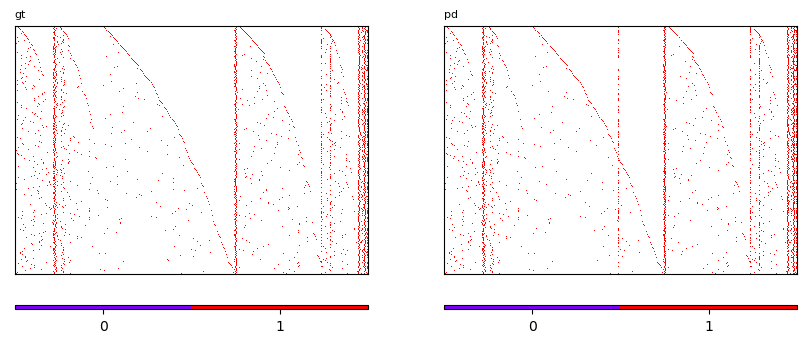

lymphography (147, 54)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567775
[I]   train_size   : 1811
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567775
[I] tau          : 0.6
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

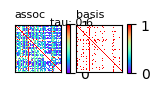

45it [00:03, 11.39it/s]                                     


[W] Stopped in advance: No pattern found.
[W] Obtained 45 factor(s).


train                                              \
                                0                                               
                 time   k   score score_0.5 desc_len    shape    TP       TPR   
0   28/06/24 05:42:55   0   262.0     131.0   1627.0  [72, 6]   347  0.191607   
1   28/06/24 05:42:55   1   448.0     224.0   1507.0  [61, 5]   589  0.325235   
2   28/06/24 05:42:55   2   539.0     269.5   1462.0  [40, 6]   711  0.392601   
3   28/06/24 05:42:55   3   610.0     305.0   1436.0  [41, 4]   802  0.442849   
4   28/06/24 05:42:55   4   658.0     329.0   1432.0  [41, 3]   853  0.471010   
5   28/06/24 05:42:56   5   705.0     352.5   1434.0  [47, 2]   900  0.496963   
6   28/06/24 05:42:56   6   747.0     373.5   1436.0  [42, 2]   942  0.520155   
7   28/06/24 05:42:56   7   789.0     394.5   1438.0  [40, 4]   991  0.547211   
8   28/06/24 05:42:56   8   830.0     415.0   1434.0  [34, 3]  1035  0.571507   
9   28/06/24 05:42:56   9   867.0     433.5   1428.0  [27, 4]  1073  0.592490   
10  28/06/24 05:42:56  10   902.0     451.0   1431.0  [33, 5]  1110  0.612921   
11  28/06/24 05:42:56  11   936.0     468.0   1437.0  [34, 6]  1147  0.633352   
12  28/06/24 05:42:56  12   968.0     484.0   1439.0  [32, 2]  1179  0.651022   
13  28/06/24 05:42:57  13  1000.0     500.0   1441.0  [30, 4]  1211  0.668691   
14  28/06/24 05:42:57  14  1029.0     514.5   1443.0  [29, 2]  1240  0.684705   
15  28/06/24 05:42:57  15  1057.0     528.5   1437.0  [17, 5]  1282  0.707896   
16  28/06/24 05:42:57  16  1084.0     542.0   1428.0  [3, 15]  1316  0.726670   
17  28/06/24 05:42:57  17  1109.0     554.5   1432.0  [25, 4]  1345  0.742684   
18  28/06/24 05:42:57  18  1132.0     566.0   1436.0  [23, 4]  1369  0.755936   
19  28/06/24 05:42:57  19  1153.0     576.5   1431.0  [11, 5]  1390  0.767532   
20  28/06/24 05:42:57  20  1174.0     587.0   1434.0  [21, 3]  1411  0.779128   
21  28/06/24 05:42:57  21  1192.0     596.0   1437.0  [18, 3]  1429  0.789067   
22  28/06/24 05:42:57  22  1210.0     605.0   1443.0  [17, 7]  1449  0.800110   
23  28/06/24 05:42:58  23  1226.0     613.0   1446.0  [16, 3]  1465  0.808945   
24  28/06/24 05:42:58  24  1241.0     620.5   1444.0   [7, 6]  1482  0.818332   
25  28/06/24 05:42:58  25  1255.0     627.5   1450.0  [14, 6]  1496  0.826063   
26  28/06/24 05:42:58  26  1267.0     633.5   1455.0  [12, 5]  1508  0.832689   
27  28/06/24 05:42:58  27  1278.0     639.0   1458.0  [10, 4]  1519  0.838763   
28  28/06/24 05:42:58  28  1289.0     644.5   1460.0  [10, 3]  1530  0.844837   
29  28/06/24 05:42:58  29  1299.0     649.5   1461.0   [2, 9]  1540  0.850359   
30  28/06/24 05:42:58  30  1306.0     653.0   1463.0   [6, 3]  1547  0.854224   
31  28/06/24 05:42:58  31  1313.0     656.5   1467.0   [5, 6]  1554  0.858089   
32  28/06/24 05:42:58  32  1320.0     660.0   1474.0   [7, 7]  1561  0.861955   
33  28/06/24 05:42:58  33  1327.0     663.5   1477.0   [7, 3]  1568  0.865820   
34  28/06/24 05:42:58  34  1333.0     666.5   1479.0   [3, 5]  1574  0.869133   
35  28/06/24 05:42:58  35  1338.0     669.0   1482.0   [3, 5]  1580  0.872446   
36  28/06/24 05:42:58  36  1342.0     671.0   1487.0   [4, 5]  1584  0.874655   
37  28/06/24 05:42:58  37  1346.0     673.0   1492.0   [2, 7]  1588  0.876864   
38  28/06/24 05:42:58  38  1350.0     675.0   1500.0   [3, 9]  1594  0.880177   
39  28/06/24 05:42:59  39  1354.0     677.0   1508.0   [3, 9]  1600  0.883490   
40  28/06/24 05:42:59  40  1356.0     678.0   1519.0  [2, 11]  1608  0.887907   
41  28/06/24 05:42:59  41  1358.0     679.0   1524.0   [2, 5]  1610  0.889012   
42  28/06/24 05:42:59  42  1360.0     680.0   1527.0   [2, 3]  1612  0.890116   
43  28/06/24 05:42:59  43  1361.0     680.5   1532.0   [1, 5]  1614  0.891220   
44  28/06/24 05:42:59  44  1362.0     681.0   1538.0   [1, 6]  1615  0.891773   

                                                                           \
                                                              

[I] model saved as: 24-06-28_17-42-59_Asso.pickle


<Figure size 640x480 with 0 Axes>

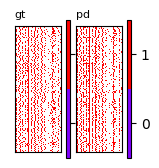

nursery (12959, 31)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567779
[I]   train_size   : 110152
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567779
[I] tau          : 0.5
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

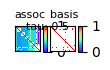

29it [00:12,  2.40it/s]                                     

[W] Stopped in advance: No pattern found.
[W] Obtained 29 factor(s).


train                                        \
                                 0                                         
                 time   k    score score_0.5  desc_len      shape     TP   
0   28/06/24 05:43:00   0   8640.0    4320.0  105834.0  [4320, 2]   8640   
1   28/06/24 05:43:00   1  15454.0    7727.0  103221.0  [4198, 3]  18344   
2   28/06/24 05:43:01   2  20316.0   10158.0  100884.0  [2522, 3]  24558   
3   28/06/24 05:43:01   3  24636.0   12318.0  100885.0  [4320, 1]  28878   
4   28/06/24 05:43:02   4  28956.0   14478.0  100886.0  [4320, 1]  33198   
5   28/06/24 05:43:02   5  33276.0   16638.0  100887.0  [4320, 1]  37518   
6   28/06/24 05:43:03   6  37596.0   18798.0  100888.0  [4320, 1]  41838   
7   28/06/24 05:43:03   7  41916.0   20958.0  100889.0  [4320, 1]  46158   
8   28/06/24 05:43:04   8  46236.0   23118.0  100890.0  [4320, 1]  50478   
9   28/06/24 05:43:04   9  49956.0   24978.0  100172.0  [3000, 2]  54198   
10  28/06/24 05:43:05  10  53336.0   26668.0   99694.0  [2900, 2]  57578   
11  28/06/24 05:43:05  11  56576.0   28288.0   99695.0  [3240, 1]  60818   
12  28/06/24 05:43:05  12  59816.0   29908.0   99696.0  [3240, 1]  64058   
13  28/06/24 05:43:06  13  63056.0   31528.0   99697.0  [3240, 1]  67298   
14  28/06/24 05:43:06  14  66296.0   33148.0   99698.0  [3240, 1]  70538   
15  28/06/24 05:43:07  15  69536.0   34768.0   99699.0  [3240, 1]  73778   
16  28/06/24 05:43:07  16  72776.0   36388.0   99700.0  [3240, 1]  77018   
17  28/06/24 05:43:08  17  75938.0   37969.0   99382.0  [2842, 2]  80180   
18  28/06/24 05:43:08  18  78530.0   39265.0   99383.0  [2592, 1]  82772   
19  28/06/24 05:43:08  19  81122.0   40561.0   99384.0  [2592, 1]  85364   
20  28/06/24 05:43:09  20  83484.0   41742.0   99226.0  [2202, 2]  87726   
21  28/06/24 05:43:09  21  85800.0   42900.0   99108.0  [2196, 2]  90042   
22  28/06/24 05:43:09  22  87863.0   43931.5   98435.0  [1388, 2]  92105   
23  28/06/24 05:43:10  23  89678.0   44839.0   98140.0  [1518, 2]  93920   
24  28/06/24 05:43:10  24  91459.0   45729.5   97822.0  [1460, 3]  96127   
25  28/06/24 05:43:10  25  92097.0   46048.5   97428.0   [240, 4]  96881   
26  28/06/24 05:43:11  26  92385.0   46192.5   97429.0   [288, 1]  97169   
27  28/06/24 05:43:11  27  92429.0   46214.5   97426.0    [33, 8]  97298   
28  28/06/24 05:43:12  28  92432.0   46216.0   97428.0     [3, 2]  97301   

                                                                              \
                                                                               
         TPR    FP       FPR      FN       FNR       ERR       ACC    Recall   
0   0.078437     0  0.000000  101512  0.921563  0.252688  0.747312  0.078437   
1   0.166534  2890  0.009912   91808  0.833466  0.235726  0.764274  0.166534   
2   0.222946  4242  0.014548   85594  0.777054  0.223623  0.776377  0.222946   
3   0.262165  4242  0.014548   81274  0.737835  0.212870  0.787130  0.262165   
4   0.301384  4242  0.014548   76954  0.698616  0.202116  0.797884  0.301384   
5   0.340602  4242  0.014548   72634  0.659398  0.191363  0.808637  0.340602   
6   0.379821  4242  0.014548   68314  0.620179  0.180609  0.819391  0.379821   
7   0.419039  4242  0.014548   63994  0.580961  0.169856  0.830144  0.419039   
8   0.458258  4242  0.014548   59674  0.541742  0.159102  0.840898  0.458258   
9   0.492029  4242  0.014548   55954  0.507971  0.149842  0.850158  0.492029   
10  0.522714  4242  0.014548   52574  0.477286  0.141429  0.858571  0.522714   
11  0.552128  4242  0.014548   49334  0.447872  0.133364  0.866636  0.552128   
12  0.581542  4242  0.014548   46094  0.418458  0.125298  0.874702  0.581542   
13  0.610956  4242  0.014548   42854  0.389044  0.117233  0.882767  0.610956   
14  0.640370  4242  0.014548   39614  0.359630  0.109168  0.890832  0.640370   
15  0.669784  4242  0.014548   36374  0.330216  0.101103  0.898897  0.669784   
16  0.699197  4242  0.014548   33134  0.300803  0.093038  0.906962  0.699197

[I] model saved as: 24-06-28_17-43-12_Asso.pickle


<Figure size 640x480 with 0 Axes>

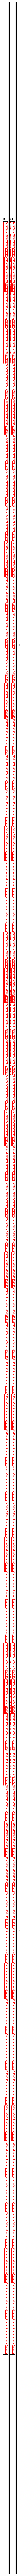

phishing (1352, 26)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567793
[I]   train_size   : 11499
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567793
[I] tau          : 0.5
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

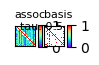

20it [00:01, 12.16it/s]                                  

[W] Stopped in advance: No pattern found.
[W] Obtained 20 factor(s).


train                                     \
                                0                                      
                 time   k   score score_0.5 desc_len     shape    TP   
0   28/06/24 05:43:14   0  1999.0     999.5  10192.0  [687, 5]  2717   
1   28/06/24 05:43:14   1  3375.0    1687.5   9222.0  [400, 6]  4605   
2   28/06/24 05:43:14   2  3909.0    1954.5   9119.0  [428, 3]  5325   
3   28/06/24 05:43:14   3  4292.0    2146.0   8872.0  [128, 8]  5926   
4   28/06/24 05:43:14   4  4617.0    2308.5   8877.0  [325, 5]  6333   
5   28/06/24 05:43:14   5  4938.0    2469.0   8870.0  [310, 4]  6665   
6   28/06/24 05:43:14   6  5206.0    2603.0   8785.0  [179, 4]  7052   
7   28/06/24 05:43:14   7  5474.0    2737.0   8779.0  [258, 4]  7330   
8   28/06/24 05:43:15   8  5728.0    2864.0   8785.0  [254, 6]  7584   
9   28/06/24 05:43:15   9  5945.0    2972.5   8749.0  [177, 4]  7840   
10  28/06/24 05:43:15  10  6147.0    3073.5   8658.0  [107, 4]  8051   
11  28/06/24 05:43:15  11  6292.0    3146.0   8597.0   [79, 5]  8218   
12  28/06/24 05:43:15  12  6418.0    3209.0   8568.0   [93, 4]  8350   
13  28/06/24 05:43:15  13  6526.0    3263.0   8526.0   [61, 5]  8485   
14  28/06/24 05:43:15  14  6633.0    3316.5   8506.0   [82, 5]  8644   
15  28/06/24 05:43:15  15  6737.0    3368.5   8502.0   [95, 5]  8762   
16  28/06/24 05:43:15  16  6830.0    3415.0   8508.0   [93, 6]  8859   
17  28/06/24 05:43:15  17  6863.0    3431.5   8514.0   [33, 6]  8896   
18  28/06/24 05:43:15  18  6873.0    3436.5   8519.0   [10, 5]  8921   
19  28/06/24 05:43:15  19  6875.0    3437.5   8523.0    [2, 4]  8923   

                                                                            \
                                                                             
         TPR    FP       FPR    FN       FNR       ERR       ACC    Recall   
0   0.236281   718  0.030356  8782  0.763719  0.270255  0.729745  0.236281   
1   0.400470  1230  0.052002  6894  0.599530  0.231111  0.768889  0.400470   
2   0.463084  1416  0.059866  6174  0.536916  0.215919  0.784081  0.463084   
3   0.515349  1634  0.069082  5573  0.484651  0.205024  0.794976  0.515349   
4   0.550744  1716  0.072549  5166  0.449256  0.195778  0.804222  0.550744   
5   0.579616  1727  0.073014  4834  0.420384  0.186647  0.813353  0.579616   
6   0.613271  1846  0.078045  4447  0.386729  0.179023  0.820977  0.613271   
7   0.637447  1856  0.078468  4169  0.362553  0.171398  0.828602  0.637447   
8   0.659536  1856  0.078468  3915  0.340464  0.164173  0.835827  0.659536   
9   0.681798  1895  0.080117  3659  0.318202  0.158000  0.842000  0.681798   
10  0.700148  1904  0.080497  3448  0.299852  0.152253  0.847747  0.700148   
11  0.714671  1926  0.081427  3281  0.285329  0.148128  0.851872  0.714671   
12  0.726150  1932  0.081681  3149  0.273850  0.144544  0.855456  0.726150   
13  0.737890  1959  0.082822  3014  0.262110  0.141471  0.858529  0.737890   
14  0.751718  2011  0.085021  2855  0.248282  0.138427  0.861573  0.751718   
15  0.761979  2025  0.085613  2737  0.238021  0.135469  0.864531  0.761979   
16  0.770415  2029  0.085782  2640  0.229585  0.132823  0.867177  0.770415   
17  0.773632  2033  0.085951  2603  0.226368  0.131884  0.868116  0.773632   
18  0.775807  2048  0.086585  2578  0.224193  0.131600  0.868400  0.775807   
19  0.775981  2048  0.086585  2576  0.224019  0.131543  0.868457  0.775981   

                        
                        
   Precision        F1  
0   0.790975  0.363868  
1   0.789203  0.531326  
2   0.789942  0.583882  
3   0.783862  0.621858  
4   0.786806  0.647944  
5   0.794209  0.670152  
6   0.792538  0.691474  
7   0.797953  0.708726  
8   0.803390  0.724390  
9   0.805342  0.738438  
10  0.808739  0.750536  
11  0.810134  0.759414  
12  0.812099  0.766723  
13  0.812428  0.773367  
14  0.811262  0.780356  
15  0.812274  0.786323  
16  0.813648  0.791441  
17  0.813981  0.793294  
18  0.813292  0.794107  
19  0.813326  0.794215

[I] model saved as: 24-06-28_17-43-15_Asso.pickle


<Figure size 640x480 with 0 Axes>

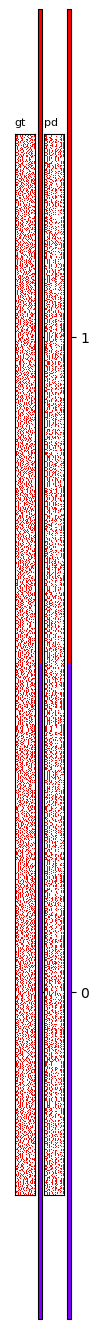

studentPerformance (394, 176)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567796
[I]   train_size   : 9229
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567796
[I] tau          : 0.7
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

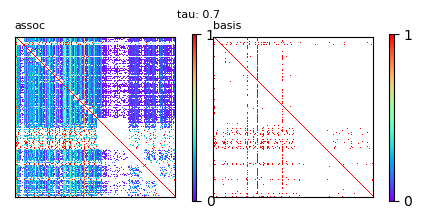

172it [00:46,  3.73it/s]                                      


[W] Stopped in advance: No pattern found.
[W] Obtained 172 factor(s).


train                                     \
                                  0                                      
                  time    k   score score_0.5 desc_len     shape    TP   
0    28/06/24 05:43:16    0   760.0     380.0   8735.0  [262, 4]   904   
1    28/06/24 05:43:17    1   984.0     492.0   8620.0  [105, 4]  1155   
2    28/06/24 05:43:17    2  1171.0     585.5   8599.0  [163, 3]  1363   
3    28/06/24 05:43:18    3  1341.0     670.5   8601.0  [169, 3]  1549   
4    28/06/24 05:43:18    4  1512.0     756.0   8598.0  [166, 2]  1720   
5    28/06/24 05:43:19    5  1681.0     840.5   8600.0  [169, 2]  1889   
6    28/06/24 05:43:19    6  1838.0     919.0   8602.0  [157, 2]  2046   
7    28/06/24 05:43:20    7  1989.0     994.5   8604.0  [150, 3]  2202   
8    28/06/24 05:43:20    8  2123.0    1061.5   8548.0   [74, 4]  2355   
9    28/06/24 05:43:21    9  2252.0    1126.0   8550.0  [129, 2]  2484   
10   28/06/24 05:43:21   10  2379.0    1189.5   8549.0  [123, 3]  2623   
11   28/06/24 05:43:21   11  2513.0    1256.5   8551.0  [134, 2]  2757   
12   28/06/24 05:43:22   12  2636.0    1318.0   8553.0  [121, 4]  2881   
13   28/06/24 05:43:22   13  2750.0    1375.0   8555.0  [113, 3]  2996   
14   28/06/24 05:43:23   14  2861.0    1430.5   8557.0  [110, 3]  3108   
15   28/06/24 05:43:23   15  2968.0    1484.0   8559.0  [107, 2]  3215   
16   28/06/24 05:43:24   16  3069.0    1534.5   8552.0   [91, 3]  3320   
17   28/06/24 05:43:24   17  3170.0    1585.0   8554.0  [101, 2]  3421   
18   28/06/24 05:43:25   18  3268.0    1634.0   8555.0   [96, 3]  3519   
19   28/06/24 05:43:25   19  3365.0    1682.5   8558.0   [97, 3]  3616   
20   28/06/24 05:43:25   20  3461.0    1730.5   8561.0   [96, 3]  3712   
21   28/06/24 05:43:26   21  3556.0    1778.0   8563.0   [95, 2]  3807   
22   28/06/24 05:43:26   22  3651.0    1825.5   8566.0   [95, 3]  3902   
23   28/06/24 05:43:27   23  3746.0    1873.0   8568.0   [94, 3]  3997   
24   28/06/24 05:43:27   24  3840.0    1920.0   8571.0   [94, 3]  4092   
25   28/06/24 05:43:27   25  3934.0    1967.0   8573.0   [94, 2]  4186   
26   28/06/24 05:43:28   26  4026.0    2013.0   8562.0   [78, 3]  4286   
27   28/06/24 05:43:28   27  4116.0    2058.0   8565.0   [90, 3]  4376   
28   28/06/24 05:43:29   28  4204.0    2102.0   8567.0   [87, 3]  4465   
29   28/06/24 05:43:29   29  4289.0    2144.5   8569.0   [85, 2]  4550   
30   28/06/24 05:43:29   30  4372.0    2186.0   8573.0   [83, 4]  4633   
31   28/06/24 05:43:30   31  4454.0    2227.0   8574.0   [79, 4]  4716   
32   28/06/24 05:43:30   32  4535.0    2267.5   8577.0   [80, 4]  4797   
33   28/06/24 05:43:30   33  4615.0    2307.5   8580.0   [80, 3]  4877   
34   28/06/24 05:43:31   34  4695.0    2347.5   8582.0   [80, 2]  4957   
35   28/06/24 05:43:31   35  4774.0    2387.0   8584.0   [79, 2]  5036   
36   28/06/24 05:43:32   36  4853.0    2426.5   8587.0   [79, 3]  5115   
37   28/06/24 05:43:32   37  4930.0    2465.0   8589.0   [77, 2]  5192   
38   28/06/24 05:43:32   38  5006.0    2503.0   8569.0   [52, 4]  5269   
39   28/06/24 05:43:33   39  5081.0    2540.5   8570.0   [75, 1]  5344   
40   28/06/24 05:43:33   40  5154.0    2577.0   8573.0   [73, 3]  5418   
41   28/06/24 05:43:34   41  5226.0    2613.0   8575.0   [71, 3]  5490   
42   28/06/24 05:43:34   42  5297.0    2648.5   8578.0   [71, 3]  5561   
43   28/06/24 05:43:34   43  5366.0    2683.0   8582.0   [69, 4]  5632   
44   28/06/24 05:43:35   44  5434.0    2717.0   8584.0   [68, 2]  5700   
45   28/06/24 05:43:35   45  5498.0    2749.0   8585.0   [63, 2]  5764   
46   28/06/24 05:43:35   46  5557.0    2778.5   8586.0   [59, 1]  5823   
47   28/06/24 05:43:36   47  5612.0    2806.0   8588.0   [55, 2]  5878   
48   28/06/24 05:43:36   48  5666.0    2833.0   8591.0   [54, 3]  5932   
49   28/06/24 05:43:36   49  5720.0    2860.0   8595.0   [54, 4]  5986   
50   28/06/24 05:43:37   50  5770.0    2885.0   8596.0   [50, 1]  6036   
51   28/06/24 05:43:37   51  5819.

[I] model saved as: 24-06-28_17-44-02_Asso.pickle


<Figure size 640x480 with 0 Axes>

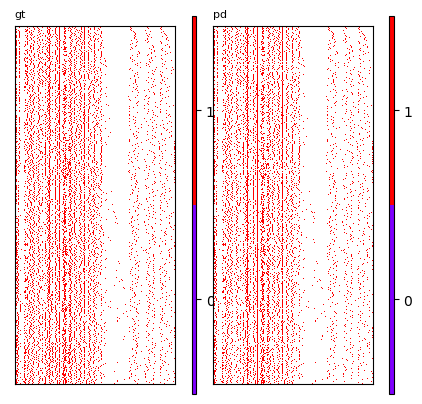

ThoraricSurgery (469, 340)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719567843
[I]   train_size   : 3369
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719567843
[I] tau          : 0.7
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

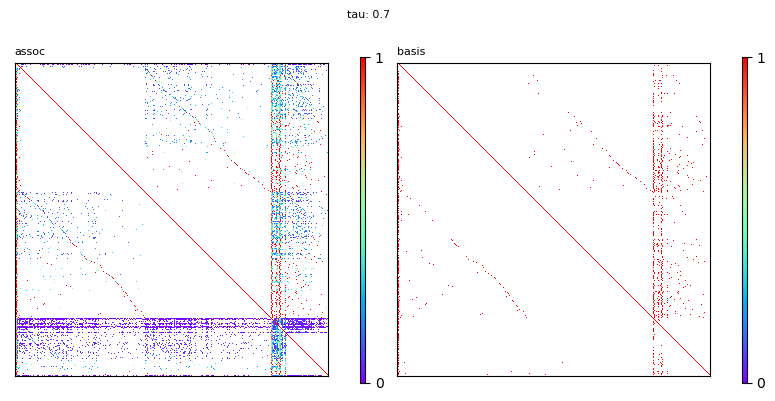

306it [02:51,  1.78it/s]                                       


[W] Stopped in advance: No pattern found.
[W] Obtained 306 factor(s).


train                                     \
                                  0                                      
                  time    k   score score_0.5 desc_len     shape    TP   
0    28/06/24 05:44:04    0   470.0     235.0   3136.0  [235, 2]   470   
1    28/06/24 05:44:05    1   764.0     382.0   2971.0  [126, 3]   806   
2    28/06/24 05:44:06    2   978.0     489.0   2967.0  [208, 2]  1020   
3    28/06/24 05:44:07    3  1133.0     566.5   2961.0  [147, 2]  1175   
4    28/06/24 05:44:08    4  1217.0     608.5   2962.0   [84, 1]  1259   
5    28/06/24 05:44:09    5  1289.0     644.5   2928.0   [36, 2]  1331   
6    28/06/24 05:44:09    6  1359.0     679.5   2929.0   [70, 1]  1401   
7    28/06/24 05:44:10    7  1415.0     707.5   2925.0   [50, 2]  1457   
8    28/06/24 05:44:11    8  1466.0     733.0   2928.0   [51, 3]  1517   
9    28/06/24 05:44:12    9  1513.0     756.5   2929.0   [47, 1]  1564   
10   28/06/24 05:44:13   10  1555.0     777.5   2911.0   [22, 2]  1606   
11   28/06/24 05:44:14   11  1583.0     791.5   2910.0   [24, 3]  1651   
12   28/06/24 05:44:15   12  1611.0     805.5   2911.0   [28, 1]  1679   
13   28/06/24 05:44:16   13  1633.0     816.5   2913.0   [22, 2]  1701   
14   28/06/24 05:44:17   14  1655.0     827.5   2910.0   [17, 2]  1723   
15   28/06/24 05:44:18   15  1676.0     838.0   2913.0   [21, 3]  1745   
16   28/06/24 05:44:18   16  1697.0     848.5   2915.0   [21, 2]  1766   
17   28/06/24 05:44:19   17  1717.0     858.5   2918.0   [20, 3]  1786   
18   28/06/24 05:44:20   18  1737.0     868.5   2921.0   [20, 3]  1807   
19   28/06/24 05:44:21   19  1757.0     878.5   2923.0   [20, 2]  1827   
20   28/06/24 05:44:22   20  1777.0     888.5   2924.0   [20, 1]  1847   
21   28/06/24 05:44:23   21  1796.0     898.0   2924.0   [17, 2]  1866   
22   28/06/24 05:44:24   22  1815.0     907.5   2926.0   [19, 2]  1885   
23   28/06/24 05:44:25   23  1834.0     917.0   2928.0   [19, 2]  1904   
24   28/06/24 05:44:25   24  1852.0     926.0   2930.0   [18, 2]  1922   
25   28/06/24 05:44:26   25  1869.0     934.5   2932.0   [17, 2]  1939   
26   28/06/24 05:44:27   26  1885.0     942.5   2933.0   [16, 1]  1955   
27   28/06/24 05:44:28   27  1901.0     950.5   2934.0   [16, 1]  1971   
28   28/06/24 05:44:29   28  1916.0     958.0   2935.0   [15, 1]  1986   
29   28/06/24 05:44:30   29  1931.0     965.5   2932.0    [8, 4]  2006   
30   28/06/24 05:44:30   30  1945.0     972.5   2934.0   [14, 2]  2020   
31   28/06/24 05:44:31   31  1958.0     979.0   2936.0   [13, 2]  2033   
32   28/06/24 05:44:32   32  1970.0     985.0   2938.0   [12, 2]  2045   
33   28/06/24 05:44:33   33  1982.0     991.0   2941.0   [12, 3]  2057   
34   28/06/24 05:44:34   34  1994.0     997.0   2943.0   [12, 2]  2069   
35   28/06/24 05:44:35   35  2006.0    1003.0   2945.0   [12, 2]  2081   
36   28/06/24 05:44:35   36  2018.0    1009.0   2947.0   [12, 2]  2093   
37   28/06/24 05:44:36   37  2029.0    1014.5   2948.0   [11, 1]  2104   
38   28/06/24 05:44:37   38  2040.0    1020.0   2950.0   [11, 2]  2115   
39   28/06/24 05:44:38   39  2051.0    1025.5   2951.0   [11, 1]  2126   
40   28/06/24 05:44:39   40  2062.0    1031.0   2953.0   [11, 2]  2137   
41   28/06/24 05:44:39   41  2073.0    1036.5   2954.0   [11, 1]  2148   
42   28/06/24 05:44:40   42  2083.0    1041.5   2955.0   [10, 1]  2158   
43   28/06/24 05:44:41   43  2093.0    1046.5   2956.0   [10, 1]  2168   
44   28/06/24 05:44:42   44  2103.0    1051.5   2959.0   [10, 3]  2179   
45   28/06/24 05:44:43   45  2113.0    1056.5   2962.0   [10, 3]  2189   
46   28/06/24 05:44:44   46  2123.0    1061.5   2964.0   [10, 2]  2199   
47   28/06/24 05:44:45   47  2133.0    1066.5   2965.0    [9, 2]  2209   
48   28/06/24 05:44:46   48  2142.0    1071.0   2965.0    [7, 2]  2218   
49   28/06/24 05:44:46   49  2151.0    1075.5   2966.0    [9, 1]  2227   
50   28/06/24 05:44:47   50  2160.0    1080.0   2968.0    [8, 3]  2236   
51   28/06/24 05:44:48   51  2169.

[I] model saved as: 24-06-28_17-46-55_Asso.pickle


<Figure size 640x480 with 0 Axes>

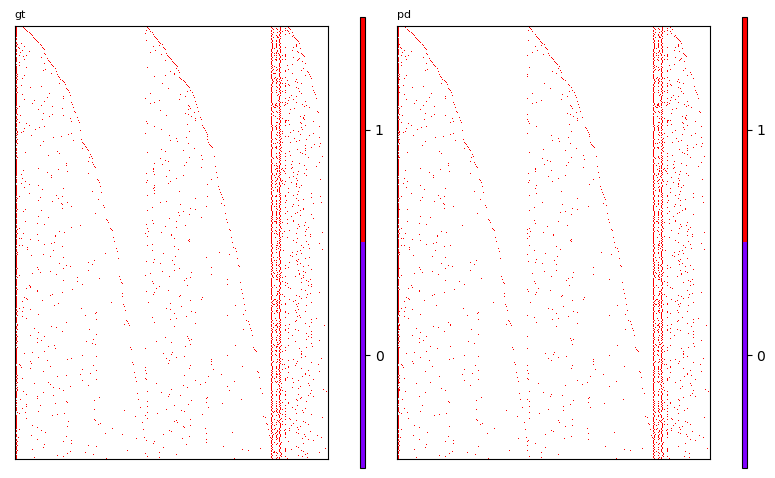

tictactoe (957, 28)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719568016
[I]   train_size   : 8944
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719568016
[I] tau          : 0.5
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

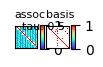

27it [00:01, 13.60it/s]                           

[W] Stopped in advance: No pattern found.
[W] Obtained 27 factor(s).


train                                     \
                                0                                      
                 time   k   score score_0.5 desc_len     shape    TP   
0   28/06/24 05:46:56   0   494.0     247.0   8672.0  [218, 4]   683   
1   28/06/24 05:46:56   1   938.0     469.0   8460.0  [228, 4]  1324   
2   28/06/24 05:46:56   2  1345.0     672.5   8272.0  [215, 4]  1919   
3   28/06/24 05:46:56   3  1729.0     864.5   8082.0  [192, 2]  2303   
4   28/06/24 05:46:56   4  2106.0    1053.0   8083.0  [377, 1]  2680   
5   28/06/24 05:46:56   5  2483.0    1241.5   8084.0  [377, 1]  3057   
6   28/06/24 05:46:57   6  2775.0    1387.5   7969.0  [173, 4]  3447   
7   28/06/24 05:46:57   7  3060.0    1530.0   7854.0  [166, 4]  3825   
8   28/06/24 05:46:57   8  3310.0    1655.0   7855.0  [250, 1]  4075   
9   28/06/24 05:46:57   9  3560.0    1780.0   7856.0  [250, 1]  4325   
10  28/06/24 05:46:57  10  3810.0    1905.0   7857.0  [250, 1]  4575   
11  28/06/24 05:46:57  11  4060.0    2030.0   7858.0  [250, 1]  4825   
12  28/06/24 05:46:57  12  4287.0    2143.5   7859.0  [227, 1]  5052   
13  28/06/24 05:46:57  13  4514.0    2257.0   7860.0  [227, 1]  5279   
14  28/06/24 05:46:57  14  4694.0    2347.0   7826.0  [144, 2]  5459   
15  28/06/24 05:46:57  15  4859.0    2429.5   7827.0  [165, 1]  5624   
16  28/06/24 05:46:57  16  5020.0    2510.0   7828.0  [161, 1]  5785   
17  28/06/24 05:46:57  17  5180.0    2590.0   7829.0  [160, 1]  5945   
18  28/06/24 05:46:57  18  5340.0    2670.0   7830.0  [160, 1]  6105   
19  28/06/24 05:46:58  19  5496.0    2748.0   7830.0  [154, 2]  6261   
20  28/06/24 05:46:58  20  5652.0    2826.0   7830.0  [154, 2]  6417   
21  28/06/24 05:46:58  21  5807.0    2903.5   7831.0  [155, 1]  6572   
22  28/06/24 05:46:58  22  5960.0    2980.0   7831.0  [151, 2]  6725   
23  28/06/24 05:46:58  23  6012.0    3006.0   7835.0   [52, 4]  6779   
24  28/06/24 05:46:58  24  6060.0    3030.0   7839.0   [48, 4]  6827   
25  28/06/24 05:46:58  25  6092.0    3046.0   7843.0   [32, 4]  6859   
26  28/06/24 05:46:58  26  6094.0    3047.0   7844.0    [2, 1]  6861   

                                                                           \
                                                                            
         TPR   FP       FPR    FN       FNR       ERR       ACC    Recall   
0   0.076364  189  0.010587  8261  0.923636  0.315346  0.684654  0.076364   
1   0.148032  386  0.021622  7620  0.851968  0.298776  0.701224  0.148032   
2   0.214557  574  0.032153  7025  0.785443  0.283587  0.716413  0.214557   
3   0.257491  574  0.032153  6641  0.742509  0.269257  0.730743  0.257491   
4   0.299642  574  0.032153  6264  0.700358  0.255187  0.744813  0.299642   
5   0.341793  574  0.032153  5887  0.658207  0.241118  0.758882  0.341793   
6   0.385398  672  0.037643  5497  0.614602  0.230221  0.769779  0.385398   
7   0.427661  765  0.042852  5119  0.572339  0.219585  0.780415  0.427661   
8   0.455613  765  0.042852  4869  0.544387  0.210255  0.789745  0.455613   
9   0.483564  765  0.042852  4619  0.516436  0.200926  0.799074  0.483564   
10  0.511516  765  0.042852  4369  0.488484  0.191596  0.808404  0.511516   
11  0.539468  765  0.042852  4119  0.460532  0.182266  0.817734  0.539468   
12  0.564848  765  0.042852  3892  0.435152  0.173795  0.826205  0.564848   
13  0.590228  765  0.042852  3665  0.409772  0.165323  0.834677  0.590228   
14  0.610353  765  0.042852  3485  0.389647  0.158606  0.841394  0.610353   
15  0.628801  765  0.042852  3320  0.371199  0.152448  0.847552  0.628801   
16  0.646802  765  0.042852  3159  0.353198  0.146440  0.853560  0.646802   
17  0.664691  765  0.042852  2999  0.335309  0.140469  0.859531  0.664691   
18  0.682581  765  0.042852  2839  0.317419  0.134498  0.865502  0.682581   
19  0.700022  765  0.042852  2683  0.299978  0.128676  0.871324  0.700022   
20  0.717464  765  0.042852  2527  0.282536  0.122854  0.877146  0.717464   
21  0.734794  765  

[I] model saved as: 24-06-28_17-46-58_Asso.pickle


<Figure size 640x480 with 0 Axes>

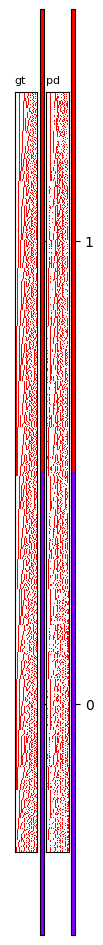

zoo (100, 28)
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719568018
[I]   train_size   : 633
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719568018
[I] tau          : 0.6
[I] k            : None
[I] tol          : 0
[I] w_fp         : 1
[I] w_fn         : 1
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.


<Figure size 640x480 with 0 Axes>

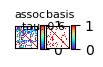

15it [00:01, 13.30it/s]                                    

[W] Stopped in advance: No pattern found.
[W] Obtained 15 factor(s).


train                                             \
                               0                                              
                 time   k  score score_0.5 desc_len    shape   TP       TPR   
0   28/06/24 05:46:59   0  196.0      98.0    483.0  [40, 6]  218  0.344392   
1   28/06/24 05:46:59   1  290.0     145.0    415.0  [20, 6]  325  0.513428   
2   28/06/24 05:46:59   2  360.0     180.0    368.0  [18, 5]  405  0.639810   
3   28/06/24 05:46:59   3  414.0     207.0    332.0  [12, 6]  468  0.739336   
4   28/06/24 05:46:59   4  443.0     221.5    316.0   [8, 5]  499  0.788310   
5   28/06/24 05:46:59   5  468.0     234.0    317.0  [25, 1]  524  0.827804   
6   28/06/24 05:46:59   6  486.0     243.0    318.0  [18, 1]  542  0.856240   
7   28/06/24 05:46:59   7  496.0     248.0    316.0   [4, 4]  553  0.873618   
8   28/06/24 05:46:59   8  504.0     252.0    317.0   [8, 1]  561  0.886256   
9   28/06/24 05:46:59   9  510.0     255.0    323.0   [6, 6]  567  0.895735   
10  28/06/24 05:46:59  10  516.0     258.0    330.0   [6, 7]  573  0.905213   
11  28/06/24 05:47:00  11  521.0     260.5    331.0   [5, 1]  578  0.913112   
12  28/06/24 05:47:00  12  523.0     261.5    332.0   [2, 1]  580  0.916272   
13  28/06/24 05:47:00  13  525.0     262.5    336.0   [2, 4]  582  0.919431   
14  28/06/24 05:47:00  14  526.0     263.0    343.0   [1, 7]  583  0.921011   

                                                                         \
                                                                          
    FP       FPR   FN       FNR       ERR       ACC    Recall Precision   
0   22  0.010152  415  0.655608  0.156071  0.843929  0.344392  0.908333   
1   35  0.016151  308  0.486572  0.122500  0.877500  0.513428  0.902778   
2   45  0.020766  228  0.360190  0.097500  0.902500  0.639810  0.900000   
3   54  0.024919  165  0.260664  0.078214  0.921786  0.739336  0.896552   
4   56  0.025842  134  0.211690  0.067857  0.932143  0.788310  0.899099   
5   56  0.025842  109  0.172196  0.058929  0.941071  0.827804  0.903448   
6   56  0.025842   91  0.143760  0.052500  0.947500  0.856240  0.906355   
7   57  0.026304   80  0.126382  0.048929  0.951071  0.873618  0.906557   
8   57  0.026304   72  0.113744  0.046071  0.953929  0.886256  0.907767   
9   57  0.026304   66  0.104265  0.043929  0.956071  0.895735  0.908654   
10  57  0.026304   60  0.094787  0.041786  0.958214  0.905213  0.909524   
11  57  0.026304   55  0.086888  0.040000  0.960000  0.913112  0.910236   
12  57  0.026304   53  0.083728  0.039286  0.960714  0.916272  0.910518   
13  57  0.026304   51  0.080569  0.038571  0.961429  0.919431  0.910798   
14  57  0.026304   50  0.078989  0.038214  0.961786  0.921011  0.910937   

              
              
          F1  
0   0.499427  
1   0.654582  
2   0.747922  
3   0.810390  
4   0.840067  
5   0.863974  
6   0.880585  
7   0.889783  
8   0.896882  
9   0.902148  
10  0.907363  
11  0.911672  
12  0.913386  
13  0.915094  
14  0.915947

[I] model saved as: 24-06-28_17-47-00_Asso.pickle


<Figure size 640x480 with 0 Axes>

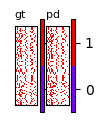

<Figure size 640x480 with 0 Axes>

In [3]:
optimal_tau = [0.2, 0.4, 0.5, 0.5, 0.5, 0.7, 0.6, 0.5, 0.5, 0.7, 0.7, 0.5, 0.6]
model_list = [None] * len(datasets)

for i, name in enumerate(datasets):
    path = root + '\\' + name + '.csv'
    df = pd.read_csv(path)
    X = csr_matrix(df.values)
    print(name, X.shape)

    from datasets import RatioSplit, NoSplit
    # split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
    split = NoSplit(X=X)
    X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

    # ASSO
    from models import Asso

    k = None
    tau = optimal_tau[i]
            
    model = Asso(k=k, tau=tau, w_fp=1, w_fn=1)
    model.fit(X_train=X_train, task='reconstruction', verbose=False, display=True)

    model_list[i] = model.pickle_path

In [4]:
for model in model_list:
    print(model)

../saved_models/24-06-28_17-39-11_Asso.pickle
../saved_models/24-06-28_17-39-13_Asso.pickle
../saved_models/24-06-28_17-39-19_Asso.pickle
../saved_models/24-06-28_17-39-31_Asso.pickle
../saved_models/24-06-28_17-39-35_Asso.pickle
../saved_models/24-06-28_17-42-54_Asso.pickle
../saved_models/24-06-28_17-42-59_Asso.pickle
../saved_models/24-06-28_17-43-12_Asso.pickle
../saved_models/24-06-28_17-43-15_Asso.pickle
../saved_models/24-06-28_17-44-02_Asso.pickle
../saved_models/24-06-28_17-46-55_Asso.pickle
../saved_models/24-06-28_17-46-58_Asso.pickle
../saved_models/24-06-28_17-47-00_Asso.pickle


In [5]:
# %load_ext autoreload
# %autoreload 2
# import sys
# sys.path.append('../')



In [6]:
# m['logs']['updates'].iloc[-1]['train'][0]['DL']

In [7]:
# from utils import description_length, F1, matmul

# n_tau = [9, 9, 9, 9, 9,   9, 9, 9, 8, 9,   9, 9, 9, 9, 9, ]
# start = np.cumsum(n_tau)
# start = np.insert(start, 0, 0)

# print(start)

# tau_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# for d in range(15):

#     trivial_patterns_list = []
#     desc_len_list = []
#     f1_list = []

#     for i in range(start[d], start[d] + n_tau[d]):

#         print(i-start[d], models[i]['X_train'].shape)

#         m = models[i]
            
#         # trivial_patterns = (m['V'].sum(axis=1) == 1).astype(int)
#         # trivial_patterns = np.cumsum(trivial_patterns)
#         # trivial_patterns = np.array(trivial_patterns).flatten()
#         # trivial_patterns_list.append(trivial_patterns)

#         _desc_len = []

#         for k in [10, 20, 50, 100]:
#             if m['U'].shape[1] > k:
#                 continue

#             desc_len = description_length(
#                 gt=m['X_train'], 
#                 U=m['U'][:, :k], 
#                 V=m['V'][:, :k], 
#                 w_model=1, w_fp=1, w_fn=1)
            
#             print()
            
#             X_pd = matmul(U=m['U'], V=m['V'].T, boolean=True, sparse=True)
#             f1 = F1(gt=m['X_train'], pd=X_pd)
#             # desc_len = m['logs']['updates'].iloc[-1]['train'][0]['DL']
#             # f1 = m['logs']['updates'].iloc[-1]['train'][0]['F1']
#             desc_len_list.append(desc_len)
#             f1_list.append(f1)

#     # plt.figure(d)
#     # legend = []
#     # for i, tau in enumerate(tau_list[:n_tau[d]]):
#     #     plt.plot(trivial_patterns_list[i])
#     #     legend.append(str(tau_list[i]) + '_' + str(desc_len_list[i]) + '_' + str(f1_list[i]))
#     # plt.legend(legend)
#     # plt.grid()
#     # plt.show()

In [8]:
# # for i, name in enumerate(datasets):
# #     path = root + '\\' + name + '.csv'
# #     # print(path)
# #     df = pd.read_csv(path, header=None)
# #     X = csr_matrix(df.values)
# #     print(name, X.shape)

# from utils import description_length, F1, matmul

# n_tau = [9, 9, 9, 9, 9,   9, 9, 9, 8, 9,   9, 9, 9, 9, 9, ]
# start = np.cumsum(n_tau)
# start = np.insert(start, 0, 0)

# print(start)

# tau_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# for d in range(15):

#     trivial_patterns_list = []
#     desc_len_list = []
#     f1_list = []

#     for i in range(start[d], start[d] + n_tau[d]):

#         print(i-start[d], models[i]['X_train'].shape)

#         m = models[i]
            
#         trivial_patterns = (m['V'].sum(axis=1) == 1).astype(int)
#         trivial_patterns = np.cumsum(trivial_patterns)
#         trivial_patterns = np.array(trivial_patterns).flatten()
#         trivial_patterns_list.append(trivial_patterns)

#         desc_len = description_length(gt=m['X_train'], U=m['U'], V=m['V'], w_model=1, w_fp=1, w_fn=1)
#         X_pd = matmul(U=m['U'], V=m['V'].T, boolean=True, sparse=True)
#         f1 = F1(gt=m['X_train'], pd=X_pd)
#         # desc_len = m['logs']['updates'].iloc[-1]['train'][0]['DL']
#         # f1 = m['logs']['updates'].iloc[-1]['train'][0]['F1']
#         desc_len_list.append(desc_len)
#         f1_list.append(f1)

#     plt.figure(d)
#     print(d, tau_list[np.argmin(desc_len_list)])
#     legend = []
#     for i, tau in enumerate(tau_list[:n_tau[d]]):
#         plt.plot(trivial_patterns_list[i])
#         legend.append(str(tau_list[i]) + '_' + str(desc_len_list[i]) + '_' + str(f1_list[i]))
#     plt.legend(legend)
#     plt.grid()
#     plt.show()


In [9]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import pickle

# for m in models:
        
#     trivial_patterns_list = []
#     for tau in tau_list:
#         X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

#         model = Asso(k=k, tau=tau, w=w)
#         model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=True, scaling=5)

#         trivial_patterns = (model.V.sum(axis=1) == 1).astype(int)
#         trivial_patterns = np.cumsum(trivial_patterns)
#         trivial_patterns = np.array(trivial_patterns).flatten()
#         trivial_patterns_list.append(trivial_patterns)

#     plt.figure(i)
#     for i, tau in enumerate(tau_list):
#         plt.plot(trivial_patterns_list[i])
#     plt.legend(tau_list)
#     plt.grid()
#     plt.show()

In [10]:
# time_start = datetime.strptime("24-06-03 08:36", '%y-%m-%d %H:%M')
# time_end = datetime.strptime("24-06-05 07:00", '%y-%m-%d %H:%M')

# for file in os.listdir(path):
#     file_path = os.path.join(path, file)
#     t = datetime.fromtimestamp(os.path.getctime(file_path))

#     if time_end >= t >= time_start and (file.endswith('HyperPlus.pickle') or file.endswith('Hyper.pickle')):
#         # file_list.append(file_path)
#         print(file_path, t)